In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn import metrics

In [2]:
data = pd.read_csv('Add_sales_data_2018.csv',index_col = [0])
data

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Date,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...
2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013


In [3]:
data.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Date,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


Features:- Adversting amount spend in 5 different companies in thousands

Response:- Profit amount received withrespect to the advertisement in thousands

In [4]:
data.shape

(205, 6)

In [5]:
data.isna().any()

Add1(in Thousands)      False
Add2(in Thousands)      False
Add3(in Thousands)      False
Add4(in Thousands)      False
Add5(in Thousands)      False
Profit(in Thousands)    False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 2018-10-08 to 2017-12-08
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Add1(in Thousands)    205 non-null    float64
 1   Add2(in Thousands)    205 non-null    float64
 2   Add3(in Thousands)    205 non-null    float64
 3   Add4(in Thousands)    205 non-null    float64
 4   Add5(in Thousands)    205 non-null    float64
 5   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6)
memory usage: 11.2+ KB


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.¶

In [7]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [8]:
data.median()

Add1(in Thousands)       269.700
Add2(in Thousands)       274.200
Add3(in Thousands)       263.250
Add4(in Thousands)       268.900
Add5(in Thousands)       268.350
Profit(in Thousands)    5088.455
dtype: float64

> Clearly Add2 company has least standard deviation

<AxesSubplot:xlabel='Date'>

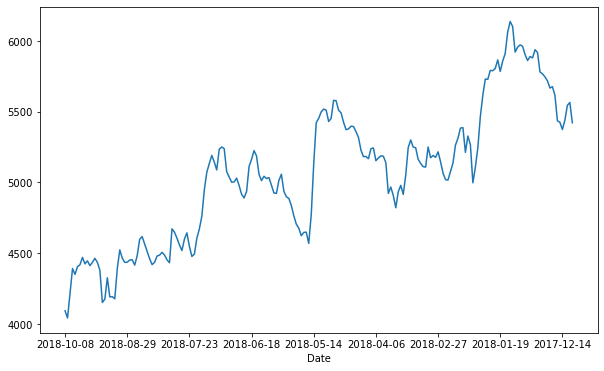

In [9]:
data['Profit(in Thousands)'].plot(figsize=(10,6))

 > Shows the profit trends

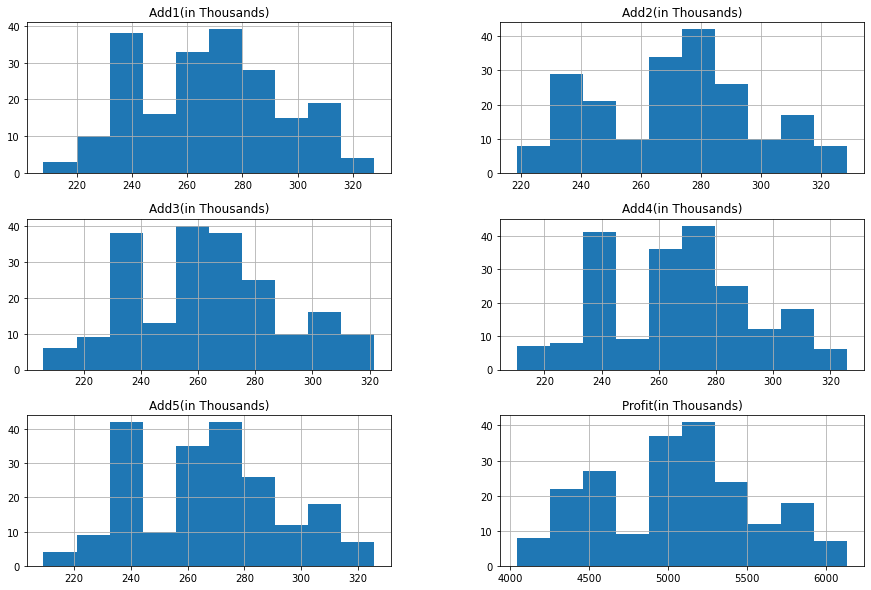

In [10]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(15,10))
plt.show()

> This will gives a fair idea about the advertisement amount spended and profit

<AxesSubplot:>

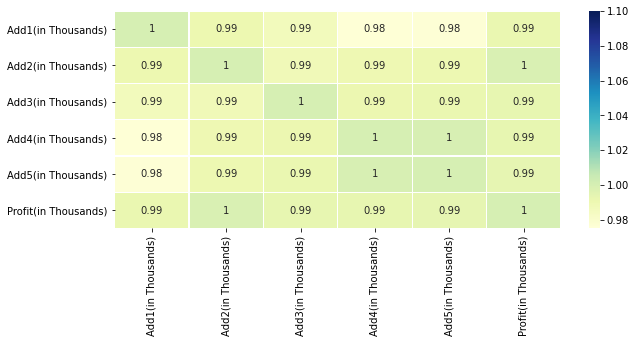

In [11]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=.975, vmax=1.1, annot=True, linewidth=.2, cmap='YlGnBu')

> Clearly all have postive strong correlation with profit

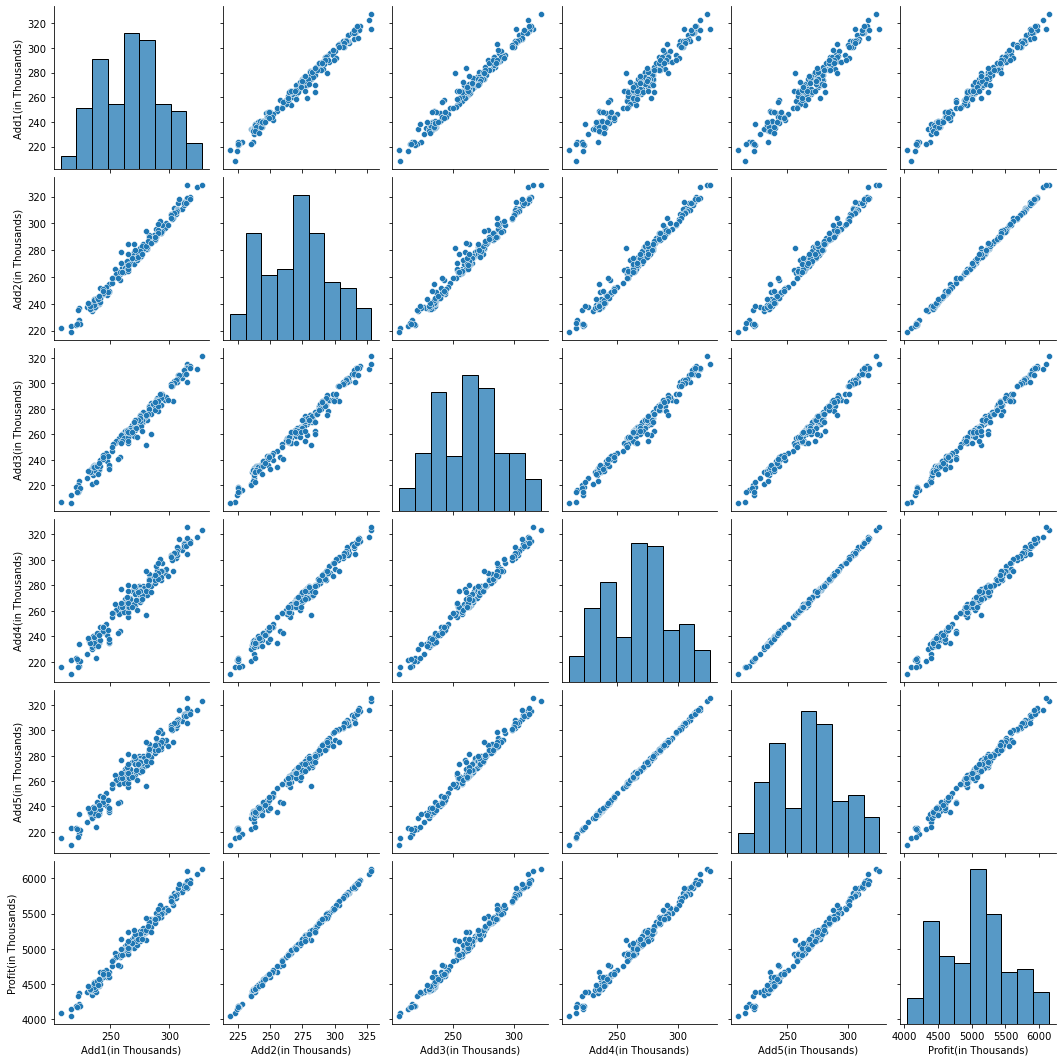

In [12]:
sns.pairplot(data)

> This also depicts the strong postive correaltion of advertising companies on sales

In [13]:
corrmatrix['Profit(in Thousands)'].sort_values(ascending=False)

Profit(in Thousands)    1.000000
Add2(in Thousands)      0.999145
Add5(in Thousands)      0.993710
Add3(in Thousands)      0.993389
Add4(in Thousands)      0.993346
Add1(in Thousands)      0.991975
Name: Profit(in Thousands), dtype: float64

> Advertising company 2 is more correlated with Profit; Advertising Company 1 is the least one

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.¶

In [14]:
data.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [15]:
y=data['Profit(in Thousands)']
X=data.drop(['Profit(in Thousands)'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.25)

In [17]:
X_train.shape

(153, 5)

In [18]:
X_test.shape

(52, 5)

In [19]:
from sklearn import linear_model

In [20]:
lr = linear_model.LinearRegression()

In [21]:
model = lr.fit(X_train, y_train)

In [22]:
predictions = model.predict(X_test)

In [23]:
print(y_test)

Date
2018-07-19    4494.144
2018-01-11    5921.116
2018-09-28    4404.686
2018-09-07    4190.965
2018-01-02    5880.541
2018-01-29    5728.804
2018-06-15    5225.140
2018-02-21    5017.503
2018-05-08    5518.561
2018-08-16    4513.600
2018-09-18    4464.110
2018-04-02    5140.372
2018-07-16    4760.877
2018-06-29    5038.222
2018-07-30    4606.340
2018-01-30    5730.999
2018-03-28    4922.845
2018-09-26    4470.775
2018-08-09    4480.363
2018-02-23    5065.652
2018-06-11    5043.705
2018-04-26    5491.792
2018-03-27    4968.030
2018-01-25    5792.175
2018-01-15    6137.800
2018-03-16    5247.011
2018-02-19    5137.534
2018-04-24    5373.275
2018-02-09    5212.949
2018-05-29    4898.776
2018-01-09    5972.337
2017-12-26    5745.806
2018-04-06    5153.977
2018-01-23    5805.521
2018-05-24    4763.690
2018-09-11    4175.677
2018-01-01    5938.474
2018-03-20    4915.682
2018-09-03    4523.704
2018-06-19    5113.337
2018-07-31    4648.627
2018-10-01    4350.683
2018-06-22    4916.064
2018-0

In [24]:
print(predictions)

[4494.144 5921.116 4404.686 4190.965 5880.541 5728.804 5225.14  5017.503
 5518.561 4513.6   4464.11  5140.372 4760.877 5038.222 4606.34  5730.999
 4922.845 4470.775 4480.363 5065.652 5043.705 5491.792 4968.03  5792.175
 6137.8   5247.011 5137.534 5373.275 5212.949 4898.776 5972.337 5745.806
 5153.977 5805.521 4763.69  4175.677 5938.474 4915.682 4523.704 5113.337
 4648.627 4350.683 4916.064 4934.682 5108.626 5167.878 4451.999 4980.446
 5177.61  5861.83  4425.005 4887.296]


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 1.6066392666895345e-24


In [27]:
print(lr.coef_)

[ 1.   12.38  3.5   1.    0.9 ]


In [28]:
# Coefficient of regression

In [29]:
print(lr.intercept_)

-1.8189894035458565e-12


In [30]:
predicted = lr.predict(X_test)

In [31]:
print(X_test)

            Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
Date                                                                     
2018-07-19              239.70              243.30              228.60   
2018-01-11              314.00              316.70              311.80   
2018-09-28              234.05              235.95              230.20   
2018-09-07              221.00              224.50              219.10   
2018-01-02              314.30              314.95              307.55   
2018-01-29              305.25              306.80              300.70   
2018-06-15              279.15              281.00              271.45   
2018-02-21              265.00              268.85              262.20   
2018-05-08              296.00              296.20              287.25   
2018-08-16              236.05              242.00              235.95   
2018-09-18              237.90              239.25              233.50   
2018-04-02              259.35        

In [32]:
predicted.shape

(52,)

In [33]:
dframe=pd.DataFrame(y_test,predicted)

In [34]:
dfr=pd.DataFrame({'Actual Profit':y_test,'Predicted Profit':predicted})

In [35]:
print(dfr)

            Actual Profit  Predicted Profit
Date                                       
2018-07-19       4494.144          4494.144
2018-01-11       5921.116          5921.116
2018-09-28       4404.686          4404.686
2018-09-07       4190.965          4190.965
2018-01-02       5880.541          5880.541
2018-01-29       5728.804          5728.804
2018-06-15       5225.140          5225.140
2018-02-21       5017.503          5017.503
2018-05-08       5518.561          5518.561
2018-08-16       4513.600          4513.600
2018-09-18       4464.110          4464.110
2018-04-02       5140.372          5140.372
2018-07-16       4760.877          4760.877
2018-06-29       5038.222          5038.222
2018-07-30       4606.340          4606.340
2018-01-30       5730.999          5730.999
2018-03-28       4922.845          4922.845
2018-09-26       4470.775          4470.775
2018-08-09       4480.363          4480.363
2018-02-23       5065.652          5065.652
2018-06-11       5043.705       

In [36]:
dfr.head(25)

,Actual Profit,Predicted Profit
Date,,
2018-07-19,4494.144,4494.144
2018-01-11,5921.116,5921.116
2018-09-28,4404.686,4404.686
2018-09-07,4190.965,4190.965
2018-01-02,5880.541,5880.541
2018-01-29,5728.804,5728.804
2018-06-15,5225.140,5225.140
2018-02-21,5017.503,5017.503
2018-05-08,5518.561,5518.561


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
lr.score(X_test,y_test)

1.0

In [39]:
import math

In [40]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Sqaured Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.1018878117633553e-12
Mean Squared Error: 1.6066392666895345e-24
Root Mean Sqaured Error: 1.2675327477779557e-12


<AxesSubplot:xlabel='Date'>

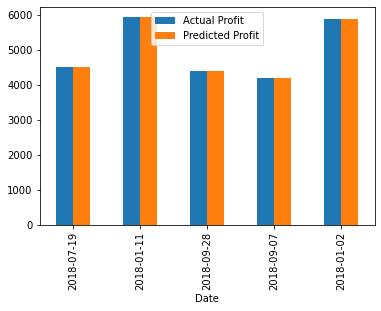

In [41]:
graph =dfr.head()
graph.plot(kind='bar')

> Graph plotted on actual and predicted profits

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [42]:
df1 = {'Add1(in Thousands)': 290, 'Add2(in Thousands)': 312, 'Add3(in Thousands)': 309,'Add4(in Thousands)': 298,'Add5(in Thousands)': 320}
df2 = data.append(df1, ignore_index = True)
df2

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...
201,290.00,292.50,282.20,284.80,284.45,5439.655
202,298.60,298.60,286.65,287.45,287.80,5545.013
203,290.00,299.55,285.90,297.85,298.35,5565.444
204,287.55,289.90,285.05,288.05,288.45,5421.842


In [43]:
data.tail(5)

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Date,,,,,,
2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [44]:
df2.tail(5)

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
201,290.00,292.50,282.20,284.80,284.45,5439.655
202,298.60,298.60,286.65,287.45,287.80,5545.013
203,290.00,299.55,285.90,297.85,298.35,5565.444
204,287.55,289.90,285.05,288.05,288.45,5421.842
205,290.00,312.00,309.00,298.00,320.00,NaN


> Clearly new data added and stored to df2

In [45]:
df2.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [46]:
y=df2['Profit(in Thousands)']
X=df2.drop(['Profit(in Thousands)'],axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.25)

In [48]:
X_train.shape

(154, 5)

In [49]:
X_test.shape

(52, 5)

In [50]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)


In [51]:
print(y_test)

52     4494.144
182    5956.323
5      4404.686
18     4190.965
189    5938.474
171    5792.175
76     5225.140
154    5017.503
104    5518.561
33     4513.600
12     4464.110
129    5140.372
55     4760.877
66     5038.222
45     4606.340
168    5616.791
130    4922.845
7      4470.775
37     4480.363
152    5065.652
80     5043.705
111    5491.792
131    4968.030
205         NaN
180    6101.648
138    5247.011
156    5137.534
113    5373.275
161    5212.949
89     4898.776
184    5962.336
194    5717.838
125    5153.977
188    5880.541
92     4763.690
16     4175.677
190    5917.925
136    4915.682
22     4523.704
74     5113.337
44     4648.627
4      4350.683
71     4916.064
134    4934.682
145    5108.626
122    5167.878
26     4451.999
83     4980.446
149    5177.610
187    5890.012
8      4425.005
90     4887.296
Name: Profit(in Thousands), dtype: float64


In [52]:
print(predictions)

[4494.144 5956.323 4404.686 4190.965 5938.474 5792.175 5225.14  5017.503
 5518.561 4513.6   4464.11  5140.372 4760.877 5038.222 4606.34  5616.791
 4922.845 4470.775 4480.363 5065.652 5043.705 5491.792 4968.03  5820.06
 6101.648 5247.011 5137.534 5373.275 5212.949 4898.776 5962.336 5717.838
 5153.977 5880.541 4763.69  4175.677 5917.925 4915.682 4523.704 5113.337
 4648.627 4350.683 4916.064 4934.682 5108.626 5167.878 4451.999 4980.446
 5177.61  5890.012 4425.005 4887.296]


> the profit are prdicted

In [53]:
print(lr.coef_)


[ 1.   12.38  3.5   1.    0.9 ]


In [54]:
print(lr.intercept_)


0.0


In [55]:
predicted = lr.predict(X_test)


In [56]:
print(X_test)

     Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
52               239.70              243.30              228.60   
182              315.00              319.10              312.55   
5                234.05              235.95              230.20   
18               221.00              224.50              219.10   
189              317.75              317.80              311.80   
171              304.00              311.25              301.65   
76               279.15              281.00              271.45   
154              265.00              268.85              262.20   
104              296.00              296.20              287.25   
33               236.05              242.00              235.95   
12               237.90              239.25              233.50   
129              259.35              278.40              259.35   
55               257.90              257.90              242.10   
66               262.70              270.15              262.7

In [57]:
predicted.shape


(52,)

In [58]:
dframe1=pd.DataFrame(y_test,predicted)


In [59]:
dfr1=pd.DataFrame({'Actual Profit':y_test,'Predicted Profit':predicted})


In [60]:
print(dfr1)


     Actual Profit  Predicted Profit
52        4494.144          4494.144
182       5956.323          5956.323
5         4404.686          4404.686
18        4190.965          4190.965
189       5938.474          5938.474
171       5792.175          5792.175
76        5225.140          5225.140
154       5017.503          5017.503
104       5518.561          5518.561
33        4513.600          4513.600
12        4464.110          4464.110
129       5140.372          5140.372
55        4760.877          4760.877
66        5038.222          5038.222
45        4606.340          4606.340
168       5616.791          5616.791
130       4922.845          4922.845
7         4470.775          4470.775
37        4480.363          4480.363
152       5065.652          5065.652
80        5043.705          5043.705
111       5491.792          5491.792
131       4968.030          4968.030
205            NaN          5820.060
180       6101.648          6101.648
138       5247.011          5247.011
1

In [61]:
dfr1.head(25)

,Actual Profit,Predicted Profit
52,4494.144,4494.144
182,5956.323,5956.323
5,4404.686,4404.686
18,4190.965,4190.965
189,5938.474,5938.474
171,5792.175,5792.175
76,5225.140,5225.140
154,5017.503,5017.503
104,5518.561,5518.561
33,4513.600,4513.600


> The Profit is expected to be as 5820

<AxesSubplot:>

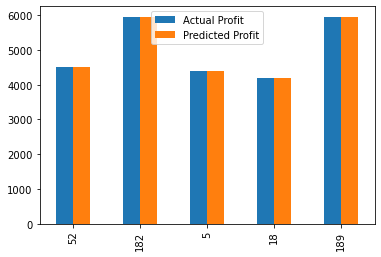

In [62]:
graph =dfr1.head()
graph.plot(kind='bar')